In [31]:
!pip install seaborn


[notice] A new release of pip is available: 23.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [140]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [141]:
data.shape

(545, 13)

In [142]:
data[10:21]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
11,9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished
14,9240000,7800,3,2,2,yes,no,no,no,no,0,yes,semi-furnished
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


Data Analysis

In [143]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [145]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [146]:
data.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [147]:
data.furnishingstatus.nunique()

3

In [148]:
data.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [149]:
data.furnishingstatus.value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [150]:
data['furnishingstatus']

0           furnished
1           furnished
2      semi-furnished
3           furnished
4           furnished
            ...      
540       unfurnished
541    semi-furnished
542       unfurnished
543         furnished
544       unfurnished
Name: furnishingstatus, Length: 545, dtype: object

In [151]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Check Missing Data

In [152]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [153]:
data.isnull().mean()

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

Unique Data Analysis

In [154]:
#Numerical Data

numerical_data = data.select_dtypes(include = np.number). columns
numerical_data

for i in numerical_data:
    print(i, '\n')
    print(data[i].value_counts())
    print()
    print('----------------------------------------------------New Column----------------------------------------------------')

price 

price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64

----------------------------------------------------New Column----------------------------------------------------
area 

area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64

----------------------------------------------------New Column----------------------------------------------------
bedrooms 

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

----------------------------------------------------New Column----------------------------------------------------
bathrooms 

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

----------------------------------------------------New Column---------------

In [99]:
#Categorical Data

categorical_data = data.select_dtypes(include = 'object').columns
categorical_data

for i in categorical_data:
    print(i, '\n')
    print(data[i].value_counts())
    print()
    print('------------------------------------------New Column------------------------------------------')

mainroad 

mainroad
yes    468
no      77
Name: count, dtype: int64

------------------------------------------New Column------------------------------------------
guestroom 

guestroom
no     448
yes     97
Name: count, dtype: int64

------------------------------------------New Column------------------------------------------
basement 

basement
no     354
yes    191
Name: count, dtype: int64

------------------------------------------New Column------------------------------------------
hotwaterheating 

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

------------------------------------------New Column------------------------------------------
airconditioning 

airconditioning
no     373
yes    172
Name: count, dtype: int64

------------------------------------------New Column------------------------------------------
prefarea 

prefarea
no     417
yes    128
Name: count, dtype: int64

------------------------------------------New Column-----------------------------

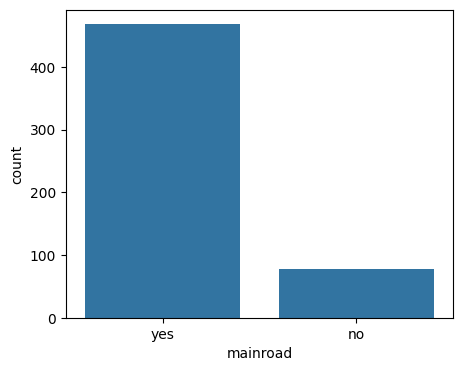

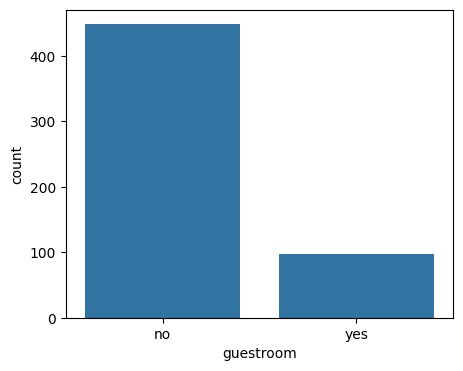

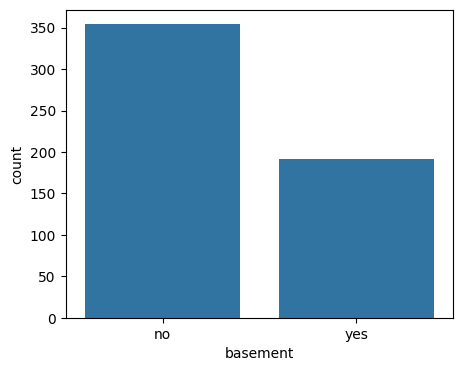

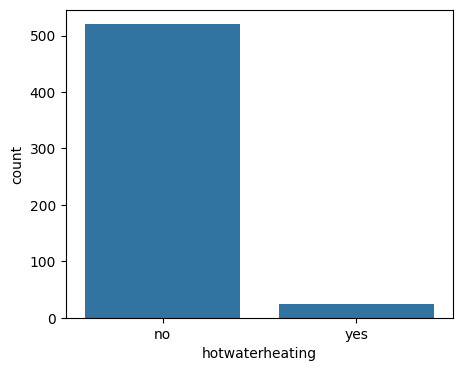

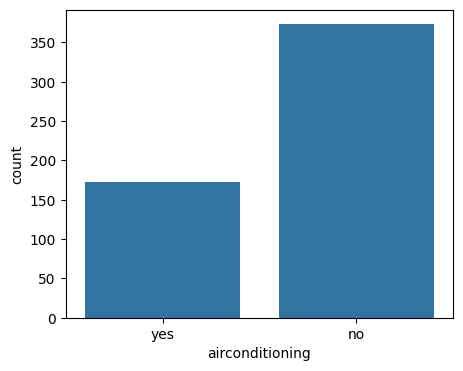

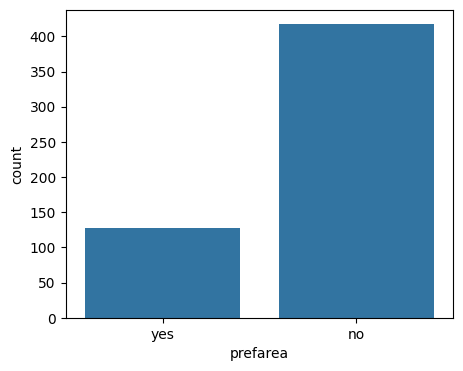

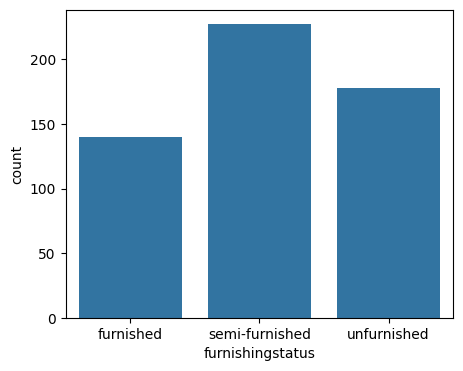

In [155]:
#Categorical Data

categorical_data = data.select_dtypes(include = 'object').columns
categorical_data

for i in categorical_data:
    plt.figure(figsize = (5,4))
    sns.countplot(data=data, x=i)
    plt.show()

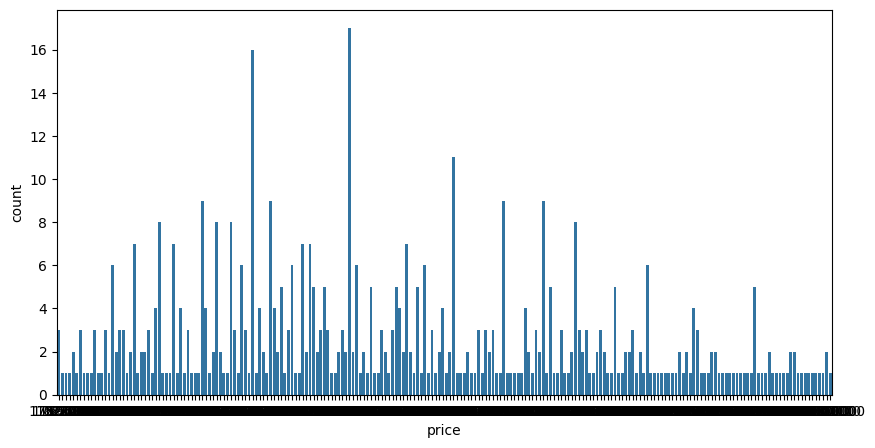

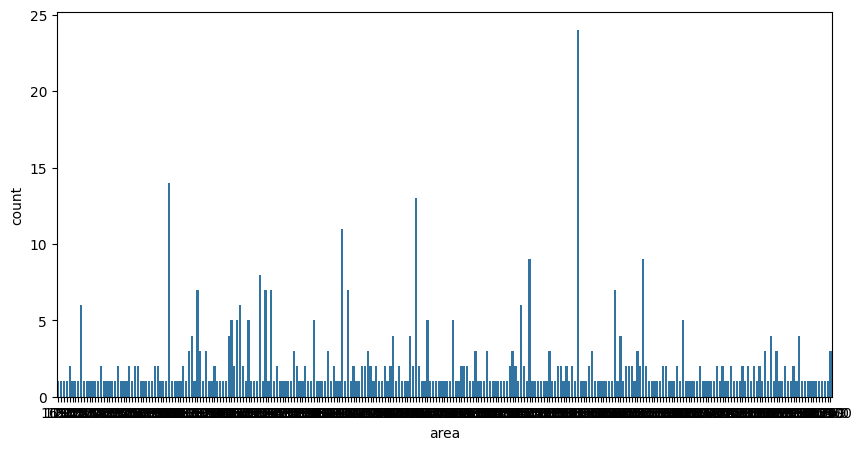

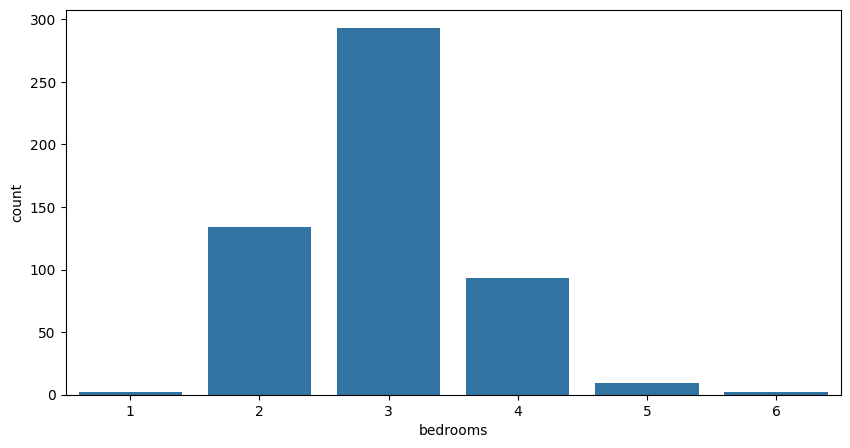

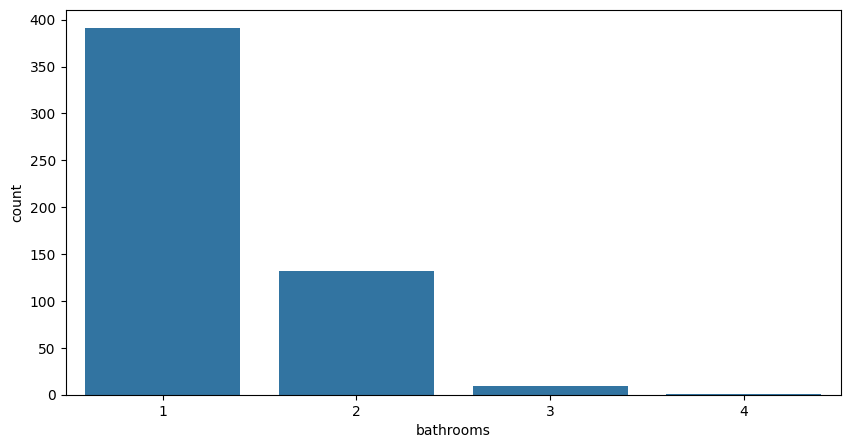

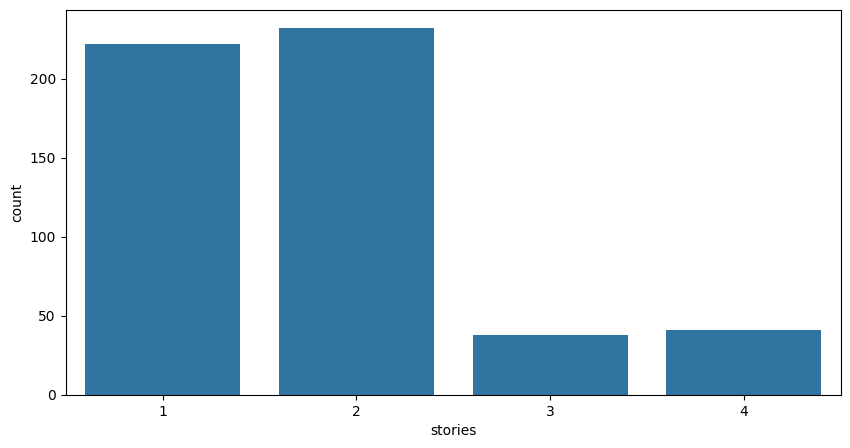

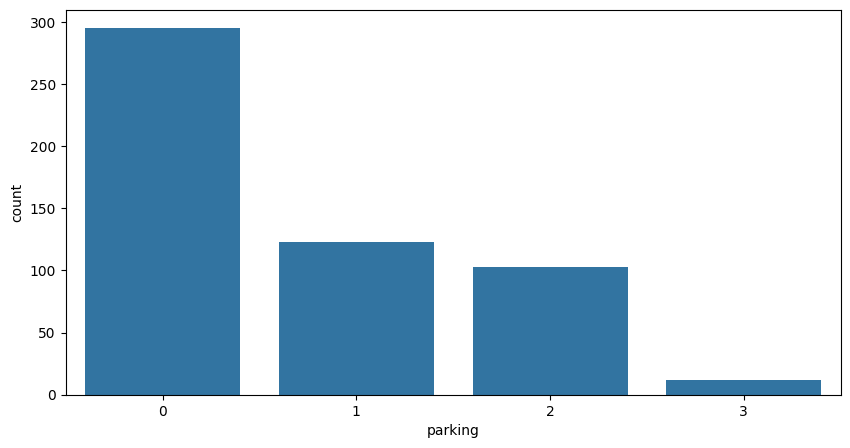

In [134]:
#Numerical Data

numerical_data = data.select_dtypes(include = np.number). columns
numerical_data

for i in numerical_data:
    plt.figure(figsize = (10,5))
    sns.countplot(data=data, x=i)
    plt.show()

In [156]:
def attribute_info(df_feature):
    print(f'Desciption of features: \n \n {df_feature.describe()} \n')
    print(f'Value counts: \n \n {df_feature.value_counts()} \n')
    print(f'Unique values: \n \n {df_feature.unique()} \n')
    print(f'Missing values: \n \n {df_feature.isnull().sum()} \n')
    print(f'Missing values in %: \n \n {df_feature.isnull().mean()} \n')

In [157]:
attribute_info(data['price'])

Desciption of features: 
 
 count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64 

Value counts: 
 
 price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64 

Unique values: 
 
 [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580

In [158]:
for col in data:
    print(f'\033[1m--------------------{col}------------------------\]')
    print('\n \n')
    attribute_info(data[col])
    print('\n \n')

--------------------price------------------------\]

 

Desciption of features: 
 
 count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64 

Value counts: 
 
 price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64 

Unique values: 
 
 [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  675

Data Visualization

In [159]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


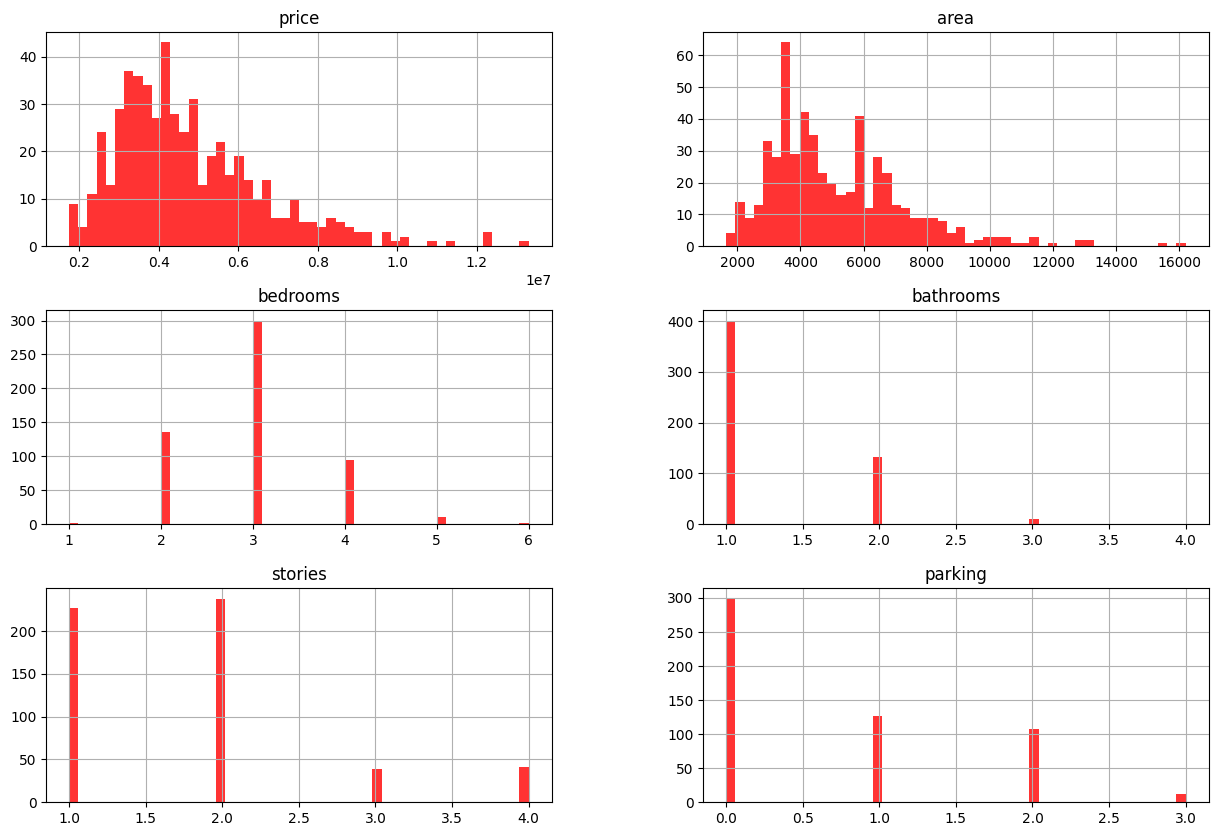

In [7]:
data.hist(figsize=(15, 10), bins=50, color='r', alpha=0.8)
plt.show()

In [161]:
data['price'].value_counts()

price
3500000     17
4200000     17
4900000     12
3150000      9
5600000      9
            ..
6580000      1
4319000      1
4375000      1
4382000      1
13300000     1
Name: count, Length: 219, dtype: int64

Dealing with Outliers

<Axes: >

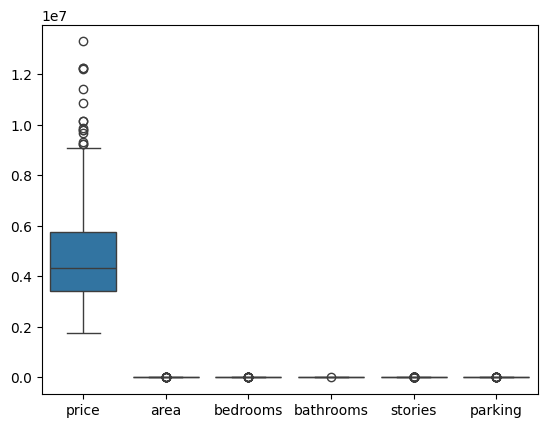

In [162]:
sns.boxplot(data)

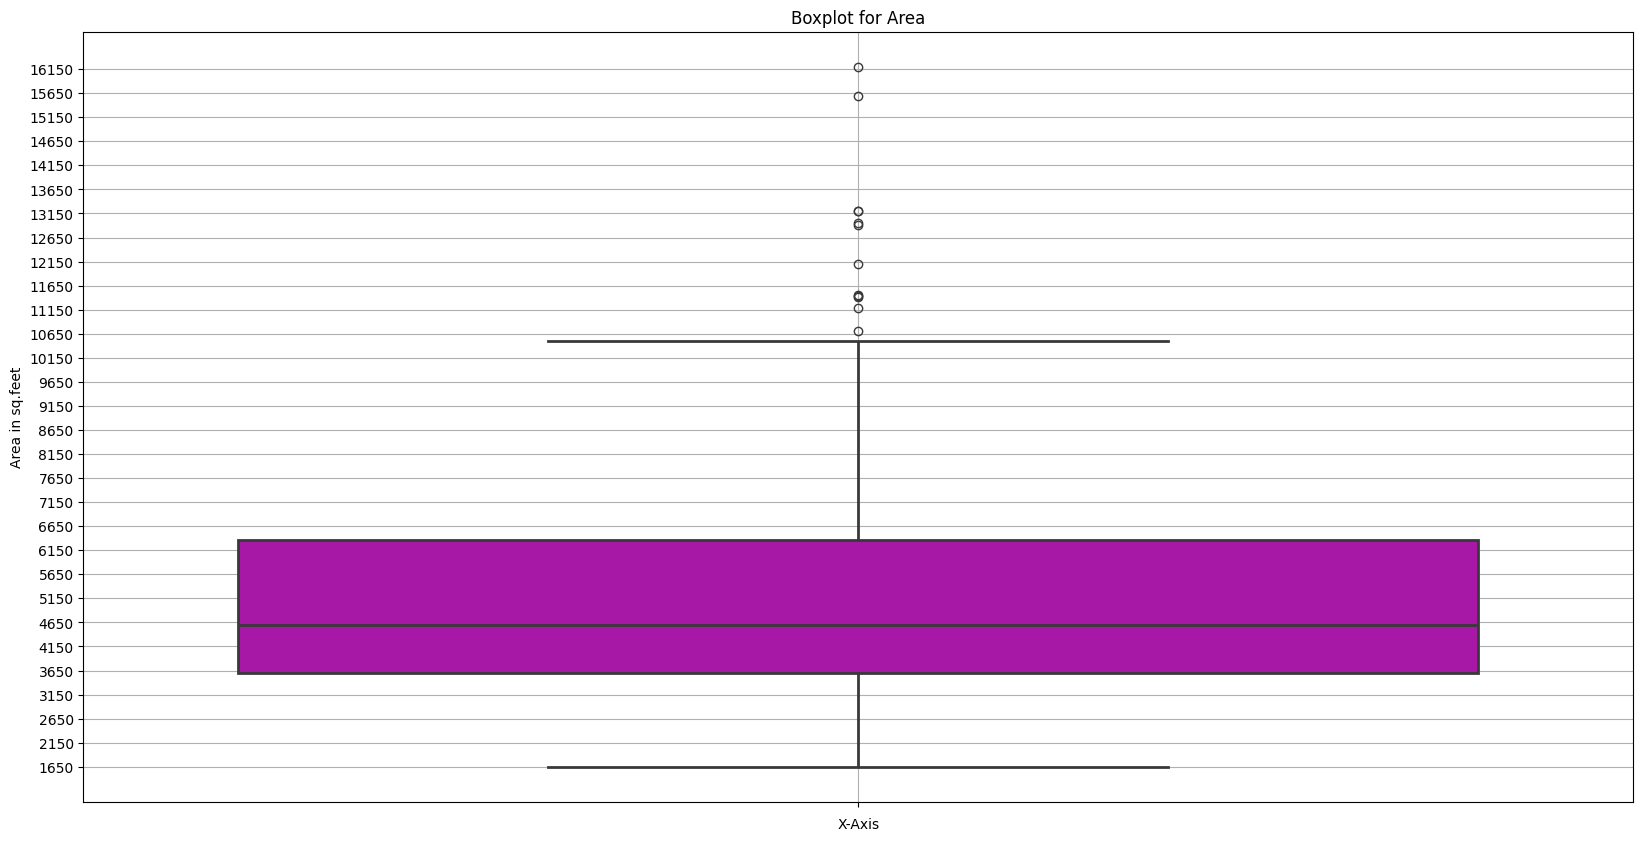

In [163]:
plt.figure(figsize=(20,10))
sns.boxplot(data['area'], color='m', linewidth=2)
plt.grid()
plt.title('Boxplot for Area')
plt.xlabel('X-Axis')
plt.ylabel('Area in sq.feet')
plt.yticks(np.arange(1650, 16201, 500))
plt.show()

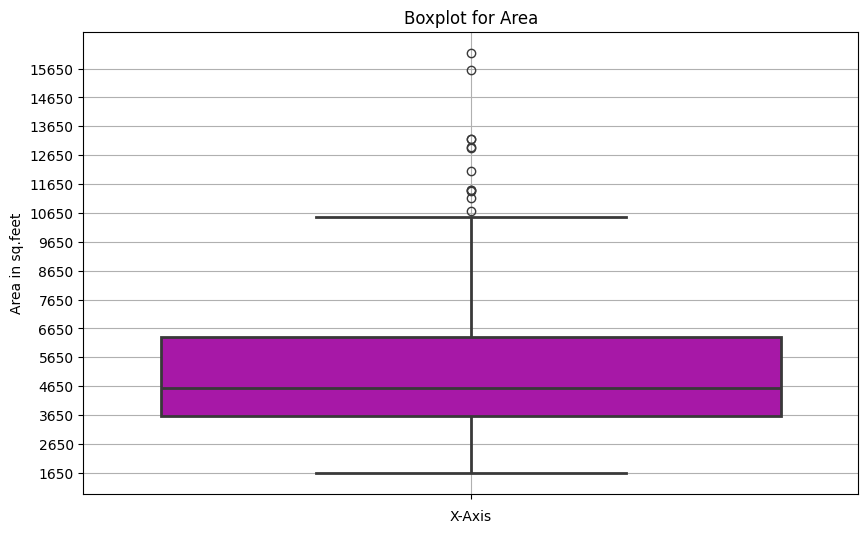

In [164]:
plt.figure(figsize=(10,6))
sns.boxplot(data['area'], color='m', linewidth=2)
plt.grid()
plt.title('Boxplot for Area')
plt.xlabel('X-Axis')
plt.ylabel('Area in sq.feet')
plt.yticks(np.arange(1650, 16201, 1000))
plt.show()

In [165]:
data.shape

(545, 13)

In [166]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [167]:
data[data['area'] > 10500]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished


In [168]:
len(data[data['area'] > 10500][['area', 'price']].index)

12

In [169]:
data[data['area'] > 10500][['area', 'price']].index

Index([7, 10, 56, 64, 66, 69, 125, 129, 186, 191, 211, 403], dtype='int64')

In [170]:
data.drop(index=[7, 10, 56, 64, 66, 69, 125, 129, 186, 191, 211, 403], axis=0, inplace=True)

In [171]:
data.shape

(533, 13)

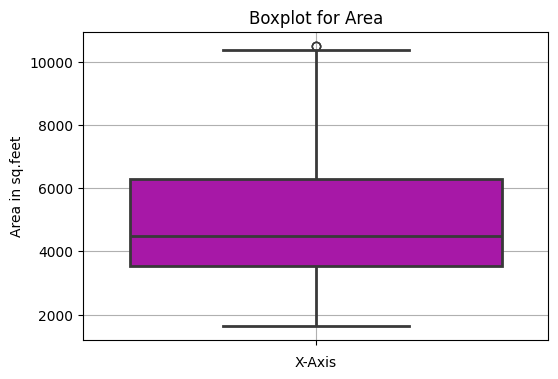

In [172]:
plt.figure(figsize=(6,4))
sns.boxplot(data['area'], color='m', linewidth=2)
plt.grid()
plt.title('Boxplot for Area')
plt.xlabel('X-Axis')
plt.ylabel('Area in sq.feet')
#plt.yticks(np.arange(1650, 16201, 1000))
plt.show()

In [174]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Correlational Matrix

In [191]:
numerical_data= data.drop(columns = ['mainroad','guestroom','basement','hotwaterheating', 'airconditioning','furnishingstatus', 'prefarea'], axis=1)
numerical_data.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.549898,0.360821,0.523560,0.431600,0.384599
area,0.549898,1.000000,0.148307,0.226712,0.119051,0.379151
bedrooms,0.360821,0.148307,1.000000,0.362699,0.412939,0.140784
bathrooms,0.523560,0.226712,0.362699,1.000000,0.328777,0.188998
stories,0.431600,0.119051,0.412939,0.328777,1.000000,0.047276
parking,0.384599,0.379151,0.140784,0.188998,0.047276,1.000000


In [192]:
data.stories.unique()

array([3, 4, 2, 1], dtype=int64)

In [193]:
data.bedrooms.unique()

array([4, 3, 5, 2, 6, 1], dtype=int64)

In [194]:
data.parking.unique()

array([2, 3, 1, 0], dtype=int64)

In [195]:
data['parking'].value_counts()

parking
0    295
1    123
2    103
3     12
Name: count, dtype: int64

In [196]:
numerical_data.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.549898,0.360821,0.523560,0.431600,0.384599
area,0.549898,1.000000,0.148307,0.226712,0.119051,0.379151
bedrooms,0.360821,0.148307,1.000000,0.362699,0.412939,0.140784
bathrooms,0.523560,0.226712,0.362699,1.000000,0.328777,0.188998
stories,0.431600,0.119051,0.412939,0.328777,1.000000,0.047276
parking,0.384599,0.379151,0.140784,0.188998,0.047276,1.000000


<Axes: >

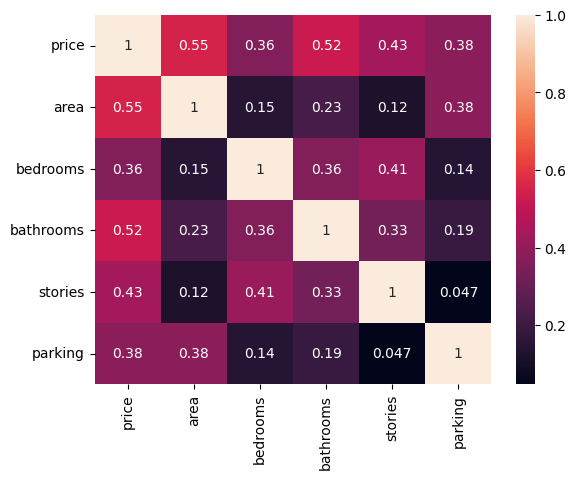

In [197]:
sns.heatmap(numerical_data.corr(), annot=True)

In [199]:
numerical_data.corr()['price']

price        1.000000
area         0.549898
bedrooms     0.360821
bathrooms    0.523560
stories      0.431600
parking      0.384599
Name: price, dtype: float64

In [200]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Encoding Technique

In [201]:
categorical_data

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [202]:
data['mainroad']

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
540    yes
541     no
542    yes
543     no
544    yes
Name: mainroad, Length: 533, dtype: object

In [203]:
data['mainroad'].map({'yes':0,'no':1})

0      0
1      0
2      0
3      0
4      0
      ..
540    0
541    1
542    0
543    1
544    0
Name: mainroad, Length: 533, dtype: int64

<Axes: xlabel='furnishingstatus', ylabel='price'>

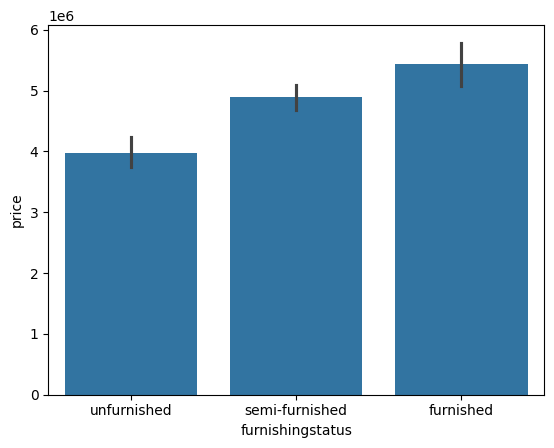

In [206]:
sns.barplot(x="furnishingstatus", y="price", data = data, order=["unfurnished", "semi-furnished", "furnished"])

In [208]:
data['mainroad']=data['mainroad'].map({'yes':0, 'no':1})
data['guestroom']=data['guestroom'].map({'yes':0, 'no':1})
data['basement']=data['basement'].map({'yes':0, 'no':1})
data['hotwaterheating']=data['hotwaterheating'].map({'yes':0, 'no':1})
data['airconditioning']=data['airconditioning'].map({'yes':0, 'no':1})
data['prefarea']=data['prefarea'].map({'yes':0, 'no':1})
data['furnishingstatus']=data['furnishingstatus'].map({'unfurnished':0, 'semi-furnished':1, 'furnished': 2})

In [209]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,2
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,2
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,1
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,2
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,2


In [211]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [212]:
data[data.duplicated() == ()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [214]:
data.duplicated().sum()

0

Again checking the correlation

In [215]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.549898,0.360821,0.523560,0.431600,-0.295076,-0.272106,-0.183040,-0.091093,-0.463609,0.384599,-0.323333,0.303018
area,0.549898,1.000000,0.148307,0.226712,0.119051,-0.304678,-0.195351,-0.051724,0.030535,-0.274750,0.379151,-0.237200,0.163787
bedrooms,0.360821,0.148307,1.000000,0.362699,0.412939,0.014761,-0.084873,-0.103469,-0.060854,-0.168110,0.140784,-0.077781,0.135711
bathrooms,0.523560,0.226712,0.362699,1.000000,0.328777,-0.043823,-0.131347,-0.115073,-0.074431,-0.197589,0.188998,-0.071314,0.158674
stories,0.431600,0.119051,0.412939,0.328777,1.000000,-0.124143,-0.041314,0.173534,-0.026930,-0.302419,0.047276,-0.037664,0.110624
mainroad,-0.295076,-0.304678,0.014761,-0.043823,-0.124143,1.000000,0.095388,0.043336,-0.013713,0.107971,-0.203403,0.198478,-0.154303
guestroom,-0.272106,-0.195351,-0.084873,-0.131347,-0.041314,0.095388,1.000000,0.373862,-0.007598,0.142281,-0.046956,0.174623,-0.125925
basement,-0.183040,-0.051724,-0.103469,-0.115073,0.173534,0.043336,0.373862,1.000000,-0.007123,0.042501,-0.053294,0.228852,-0.107190
hotwaterheating,-0.091093,0.030535,-0.060854,-0.074431,-0.026930,-0.013713,-0.007598,-0.007123,1.000000,-0.128515,-0.069166,-0.053698,-0.022557
airconditioning,-0.463609,-0.274750,-0.168110,-0.197589,-0.302419,0.107971,0.142281,0.042501,-0.128515,1.000000,-0.156199,0.118206,-0.150511


<Axes: >

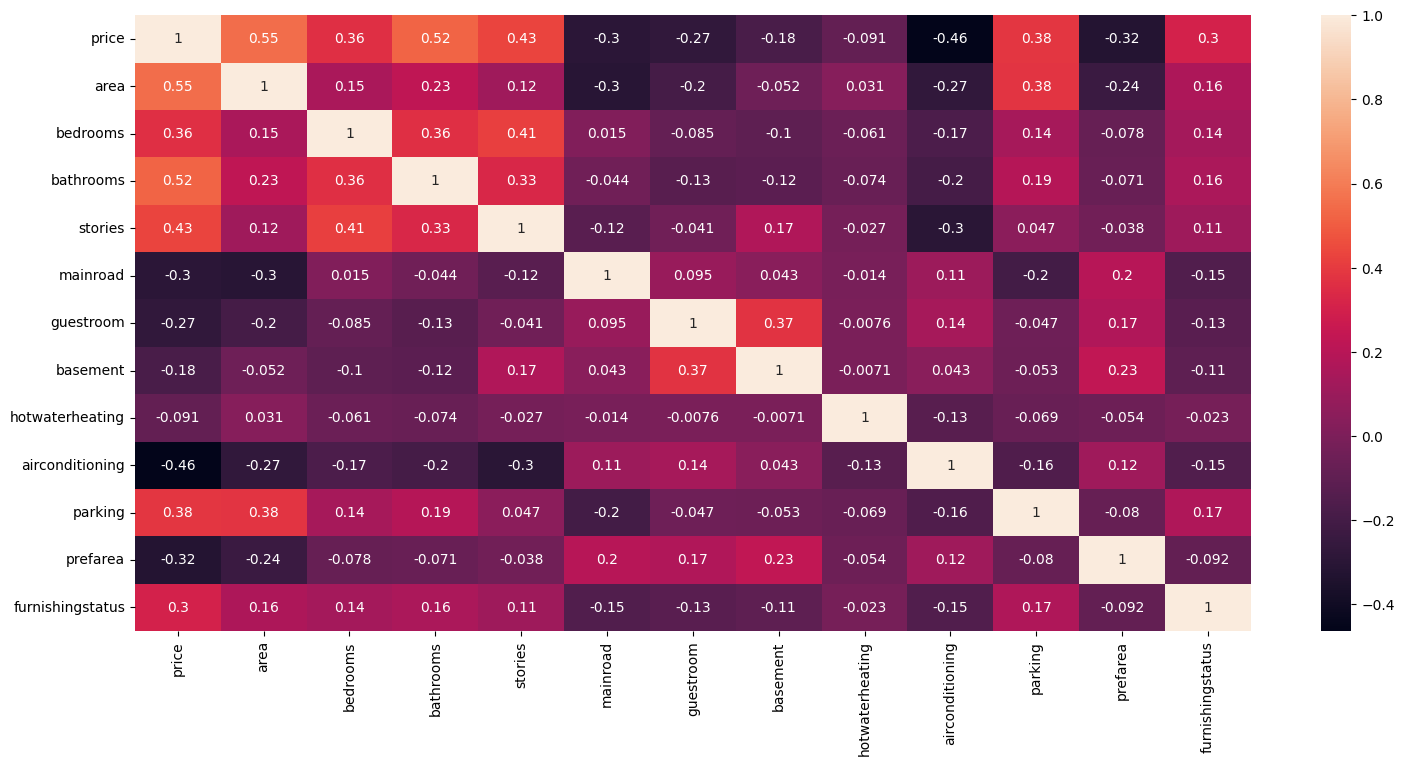

In [217]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(), annot=True)

In [218]:
data.corr()['price']

price               1.000000
area                0.549898
bedrooms            0.360821
bathrooms           0.523560
stories             0.431600
mainroad           -0.295076
guestroom          -0.272106
basement           -0.183040
hotwaterheating    -0.091093
airconditioning    -0.463609
parking             0.384599
prefarea           -0.323333
furnishingstatus    0.303018
Name: price, dtype: float64

In [219]:
var=abs(data.corr()['price'])
var

price               1.000000
area                0.549898
bedrooms            0.360821
bathrooms           0.523560
stories             0.431600
mainroad            0.295076
guestroom           0.272106
basement            0.183040
hotwaterheating     0.091093
airconditioning     0.463609
parking             0.384599
prefarea            0.323333
furnishingstatus    0.303018
Name: price, dtype: float64

In [220]:
var.sort_values(ascending=False)

price               1.000000
area                0.549898
bathrooms           0.523560
airconditioning     0.463609
stories             0.431600
parking             0.384599
bedrooms            0.360821
prefarea            0.323333
furnishingstatus    0.303018
mainroad            0.295076
guestroom           0.272106
basement            0.183040
hotwaterheating     0.091093
Name: price, dtype: float64

Model Building

In [221]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,2
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,2
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,1
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,2
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,0,1,0,1,1,2,1,0
541,1767150,2400,3,1,1,1,1,1,1,1,0,1,1
542,1750000,3620,2,1,1,0,1,1,1,1,0,1,0
543,1750000,2910,3,1,1,1,1,1,1,1,0,1,2


In [222]:
X=data.iloc[0:545, 1:13]
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,0,1,1,1,0,2,0,2
1,8960,4,4,4,0,1,1,1,0,3,1,2
2,9960,3,2,2,0,1,0,1,1,2,0,1
3,7500,4,2,2,0,1,0,1,0,3,0,2
4,7420,4,1,2,0,0,0,1,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,0,1,0,1,1,2,1,0
541,2400,3,1,1,1,1,1,1,1,0,1,1
542,3620,2,1,1,0,1,1,1,1,0,1,0
543,2910,3,1,1,1,1,1,1,1,0,1,2


In [223]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [226]:
X=data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,0,1,1,1,0,2,0,2
1,8960,4,4,4,0,1,1,1,0,3,1,2
2,9960,3,2,2,0,1,0,1,1,2,0,1
3,7500,4,2,2,0,1,0,1,0,3,0,2
4,7420,4,1,2,0,0,0,1,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,0,1,0,1,1,2,1,0
541,2400,3,1,1,1,1,1,1,1,0,1,1
542,3620,2,1,1,0,1,1,1,1,0,1,0
543,2910,3,1,1,1,1,1,1,1,0,1,2


In [227]:
y = data['price']
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 533, dtype: int64

In [233]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [234]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [238]:
#X.sample(400, random_state=42)
#X.iloc[:400]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,0,1,1,1,0,2,0,2
1,8960,4,4,4,0,1,1,1,0,3,1,2
2,9960,3,2,2,0,1,0,1,1,2,0,1
3,7500,4,2,2,0,1,0,1,0,3,0,2
4,7420,4,1,2,0,0,0,1,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
407,2145,3,1,3,0,1,1,1,1,0,0,2
408,4000,2,1,1,0,1,1,1,1,0,1,0
409,3185,2,1,1,0,1,1,1,1,2,1,0
410,3850,3,1,1,0,1,1,1,1,0,1,0


In [239]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [240]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
423,3750,3,1,1,0,1,1,1,1,0,1,0
216,6040,3,1,1,0,1,1,1,1,2,0,1
466,3090,3,1,2,1,1,1,1,1,0,1,1
71,6000,4,2,4,0,1,1,1,0,0,1,0
396,3640,2,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
76,6420,3,2,3,0,1,1,1,0,0,0,2
288,5040,3,1,2,0,1,0,1,0,0,1,0
11,6000,4,3,2,0,0,0,0,1,2,1,1
370,4280,2,1,1,0,1,1,1,0,2,1,1


In [241]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
47,6600,3,1,4,0,1,1,1,0,3,0,2
323,5400,3,1,1,0,1,1,1,1,3,1,1
502,3480,2,1,1,0,1,1,1,1,1,1,1
491,2640,2,1,1,1,1,1,1,1,1,1,2
476,5850,3,1,2,0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
304,8250,3,1,1,0,1,0,1,1,3,1,1
170,5500,3,2,1,0,1,0,1,1,0,1,1
12,6550,4,2,2,0,1,1,1,0,1,0,1
515,3210,3,1,2,0,1,0,1,1,0,1,0


In [242]:
y_train

423    3360000
216    4830000
466    3010000
71     6755000
396    3500000
        ...   
76     6650000
288    4200000
11     9681000
370    3640000
202    4900000
Name: price, Length: 426, dtype: int64

In [243]:
y_test

47     7490000
323    4025000
502    2660000
491    2835000
476    2940000
        ...   
304    4193000
170    5250000
12     9310000
515    2450000
242    4550000
Name: price, Length: 107, dtype: int64

In [245]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [246]:
y_pred_train= model.predict(X_train)
y_pred_test=model.predict(X_test)

In [247]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
423,3750,3,1,1,0,1,1,1,1,0,1,0
216,6040,3,1,1,0,1,1,1,1,2,0,1
466,3090,3,1,2,1,1,1,1,1,0,1,1
71,6000,4,2,4,0,1,1,1,0,0,1,0
396,3640,2,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
76,6420,3,2,3,0,1,1,1,0,0,0,2
288,5040,3,1,2,0,1,0,1,0,0,1,0
11,6000,4,3,2,0,0,0,0,1,2,1,1
370,4280,2,1,1,0,1,1,1,0,2,1,1


In [248]:
y_train

423    3360000
216    4830000
466    3010000
71     6755000
396    3500000
        ...   
76     6650000
288    4200000
11     9681000
370    3640000
202    4900000
Name: price, Length: 426, dtype: int64

In [249]:
y_pred_train

array([2825775.39688565, 4925315.0756332 , 2820692.26547318,
       6604074.45878558, 3206558.07937855, 2532507.86439748,
       5939502.23149163, 4107072.56508404, 3010893.35844926,
       3713220.24898456, 3270103.01017955, 3080193.13435662,
       6659794.77711828, 2651716.50625652, 6496835.16989162,
       5135717.63465299, 7836374.95606023, 6514012.56782262,
       2954883.78705578, 4854097.84764757, 4191686.41646457,
       3399241.0219124 , 2005555.82133704, 3552549.59052192,
       5427320.10642685, 6868398.67972564, 5039138.91474864,
       9072090.0172691 , 6865846.69514828, 4726801.85636575,
       5966800.67604715, 6482295.32055795, 6775997.53084959,
       4401219.84649094, 3862765.17698022, 7505683.89874918,
       7998533.9957097 , 9683286.90173149, 7584112.07832916,
       3134747.25019652, 4021776.50057448, 4476615.72891745,
       5559781.29331119, 5203329.46344132, 4188105.67981712,
       5778212.17650566, 4729794.46742533, 6419553.11079631,
       4463187.57362678,

In [250]:
y_test

47     7490000
323    4025000
502    2660000
491    2835000
476    2940000
        ...   
304    4193000
170    5250000
12     9310000
515    2450000
242    4550000
Name: price, Length: 107, dtype: int64

In [251]:
y_pred_test

array([ 7755506.19507146,  4451432.32698106,  3163244.23618398,
        2692176.56988033,  4555130.70287504,  5111597.27559724,
        4432228.40329082,  4885233.28675182,  2393641.47136393,
        7268011.63604269,  3688853.83898367,  5528472.47044181,
        6566183.45509139,  5022301.82845381,  2936128.26084546,
        2706419.32982011,  2638984.44810907,  4359898.02820188,
        6776837.18195037,  2957620.52381816,  5796264.93240187,
        4310500.60153965,  6075319.80107574,  3900963.41365365,
        4513276.34274961,  4548518.23789909,  2193150.28796447,
        6070889.7813356 ,  8240841.5511126 ,  4701149.57428949,
        5329240.08047042,  4061638.54356573,  4347468.90813319,
        6909226.48985411,  3252226.24372187,  4322071.00329138,
        3829967.10769675,  4301416.67386464,  3342049.97870041,
        3870965.54169581,  2879214.67187902,  6411065.76175882,
        5109977.5688177 ,  5035020.3128247 ,  3659377.5591817 ,
        5760950.24789017,  5738735.17992

In [252]:
model.coef_

array([ 2.70711520e+02,  1.38866393e+05,  9.01166423e+05,  4.17256461e+05,
       -4.78319543e+05, -2.56398937e+05, -4.28826863e+05, -9.12357723e+05,
       -8.77395942e+05,  3.14777790e+05, -6.15405166e+05,  2.34649553e+05])

In [253]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [256]:
pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficients'])

,Coefficients
area,270.711520
bedrooms,138866.393034
bathrooms,901166.423408
stories,417256.461297
mainroad,-478319.542541
guestroom,-256398.937266
basement,-428826.863049
hotwaterheating,-912357.722634
airconditioning,-877395.941643
parking,314777.789714


For Training Data

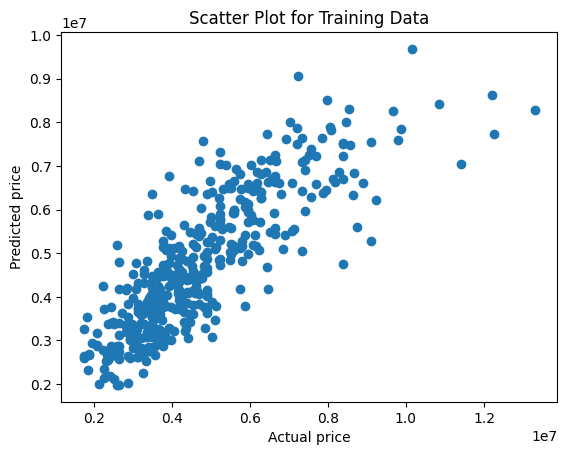

In [257]:
plt.scatter(y_train, y_pred_train)
plt.title('Scatter Plot for Training Data')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.show()

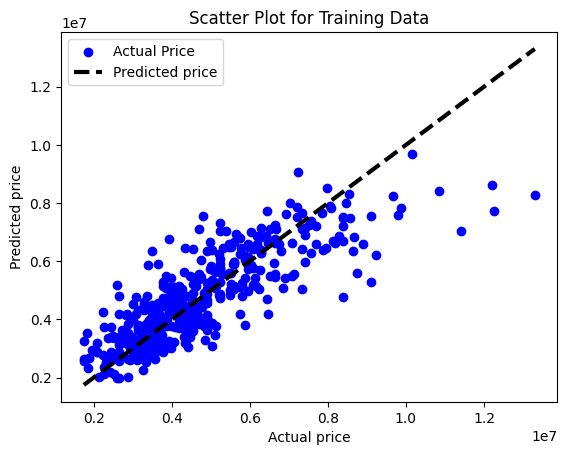

In [258]:
plt.scatter(y_train, y_pred_train, color='b', label='Actual Price')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],'k--', color='k', lw=3, label="Predicted price")
plt.title('Scatter Plot for Training Data')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.legend()
plt.show()

For test data

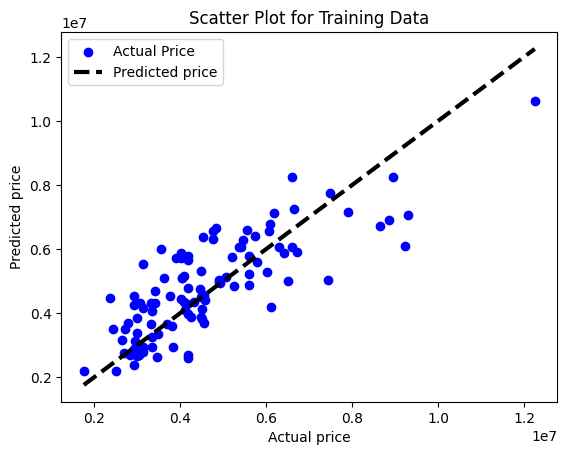

In [259]:
plt.scatter(y_test, y_pred_test, color='b', label='Actual Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--', color='k', lw=3, label="Predicted price")
plt.title('Scatter Plot for Training Data')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.legend()
plt.show()

Evaluation Metrics For Training Data

In [269]:
def training_evaluation(actual, predicted):
    
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R2_Score: {r2}')

In [270]:
training_evaluation(y_train, y_pred_train)

MSE: 1105169078129.722
RMSE: 1051270.221270308
MAE: 767468.8867358054
R2_Score: 0.6846055478865771


Evaluation Metrics for Test Data

In [271]:
def test_evaluation(actual, predicted):
    
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R2_Score: {r2}')

In [272]:
test_evaluation(y_test, y_pred_test)

MSE: 1180430381270.3054
RMSE: 1086476.1300968858
MAE: 846364.8952933946
R2_Score: 0.6165550084565123


Polynomial Regression: For Non_Linear Data

In [274]:
from sklearn.preprocessing import PolynomialFeatures

In [277]:
poly_features = PolynomialFeatures(degree=2)
poly_features

PolynomialFeatures()

In [278]:
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

In [279]:
X_train_poly

array([[1.00e+00, 3.75e+03, 3.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 6.04e+03, 3.00e+00, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 3.09e+03, 3.00e+00, ..., 1.00e+00, 1.00e+00, 1.00e+00],
       ...,
       [1.00e+00, 6.00e+03, 4.00e+00, ..., 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 4.28e+03, 2.00e+00, ..., 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 4.12e+03, 2.00e+00, ..., 1.00e+00, 1.00e+00, 1.00e+00]])

In [280]:
poly = LinearRegression()
poly.fit(X_train_poly, y_train)

LinearRegression()

In [281]:
y_pred_train_poly = poly.predict(X_train_poly)
y_pred_test_poly = poly.predict(X_test_poly)

In [282]:
y_train

423    3360000
216    4830000
466    3010000
71     6755000
396    3500000
        ...   
76     6650000
288    4200000
11     9681000
370    3640000
202    4900000
Name: price, Length: 426, dtype: int64

In [283]:
y_pred_train

array([2825775.39688565, 4925315.0756332 , 2820692.26547318,
       6604074.45878558, 3206558.07937855, 2532507.86439748,
       5939502.23149163, 4107072.56508404, 3010893.35844926,
       3713220.24898456, 3270103.01017955, 3080193.13435662,
       6659794.77711828, 2651716.50625652, 6496835.16989162,
       5135717.63465299, 7836374.95606023, 6514012.56782262,
       2954883.78705578, 4854097.84764757, 4191686.41646457,
       3399241.0219124 , 2005555.82133704, 3552549.59052192,
       5427320.10642685, 6868398.67972564, 5039138.91474864,
       9072090.0172691 , 6865846.69514828, 4726801.85636575,
       5966800.67604715, 6482295.32055795, 6775997.53084959,
       4401219.84649094, 3862765.17698022, 7505683.89874918,
       7998533.9957097 , 9683286.90173149, 7584112.07832916,
       3134747.25019652, 4021776.50057448, 4476615.72891745,
       5559781.29331119, 5203329.46344132, 4188105.67981712,
       5778212.17650566, 4729794.46742533, 6419553.11079631,
       4463187.57362678,

In [284]:
y_pred_train_poly

array([ 2801823.87130313,  4941386.0664347 ,  3302840.69433086,
        5815871.35157208,  3408969.14024737,  3163084.56635305,
        6113293.32823085,  3877252.13084728,  3410253.48585708,
        3881601.97931214,  3290456.71644093,  3190413.78011562,
        5836584.82549196,  2845421.03428303,  6914226.04540932,
        5354599.50781103,  8240765.9197609 ,  5639190.42648456,
        3416542.94638839,  4982938.14302332,  3643027.43384112,
        3650078.95037083,  2565931.9010447 ,  3084728.89574474,
        5940339.83645859,  6119829.17746158,  5232907.13967691,
        7951298.9686577 ,  8048543.08458634,  3926300.31853264,
        6292242.5856086 ,  6504347.49452552,  5370407.25724417,
        4058622.05568643,  3839968.39481301,  7303331.69253943,
        9305981.51127256, 11204744.19715246,  9327896.78143906,
        3176437.90129812,  4844601.04323633,  3969412.8518237 ,
        6322501.08055845,  4973539.94146303,  3718189.81881487,
        5122086.54493775,  4603420.76402

Training Data Evaluation

In [285]:
def training_evaluation(actual, predicted):
    
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R2_Score: {r2}')

In [286]:
training_evaluation(y_train, y_pred_train_poly)

MSE: 727512852167.0751
RMSE: 852943.6395020923
MAE: 637544.0578615724
R2_Score: 0.7923815260891912


Test Data Evaluation

In [287]:
def test_evaluation(actual, predicted):
    
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R2_Score: {r2}')

In [289]:
test_evaluation(y_test, y_pred_test_poly)

MSE: 1463963800130.1484
RMSE: 1209943.7177530813
MAE: 933899.8277405924
R2_Score: 0.5244534570884329


Best Fit Line with Linear Regression- For Training

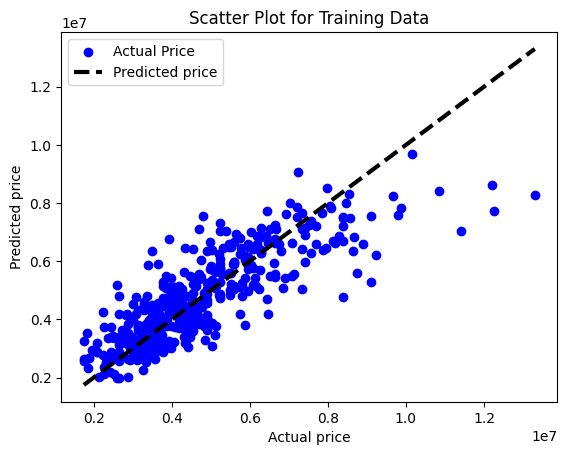

In [290]:
#Training

plt.scatter(y_train, y_pred_train, color='b', label='Actual Price')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],'k--', color='k', lw=3, label="Predicted price")
plt.title('Scatter Plot for Training Data')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.legend()
plt.show()

Best Fit Line with Polynomial Regression- For Training

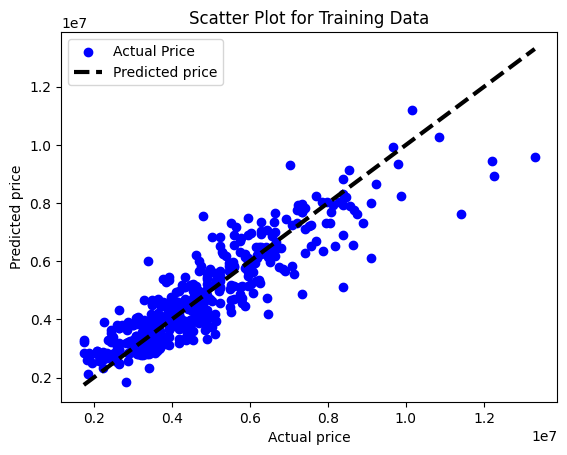

In [291]:
#Training

plt.scatter(y_train, y_pred_train_poly, color='b', label='Actual Price')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],'k--', color='k', lw=3, label="Predicted price")
plt.title('Scatter Plot for Training Data')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.legend()
plt.show()

Best Fit Line with Linear Regression- For Testing

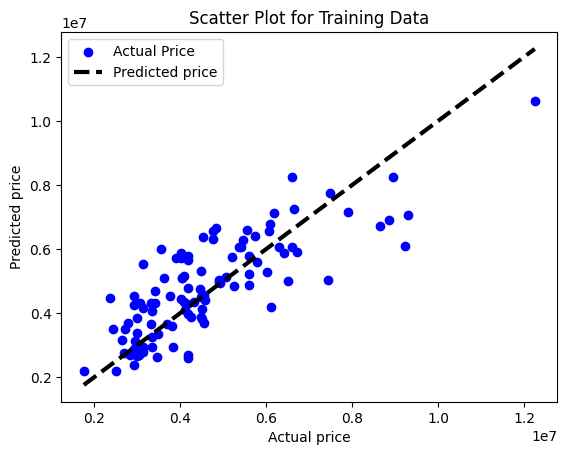

In [293]:
plt.scatter(y_test, y_pred_test, color='b', label='Actual Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--', color='k', lw=3, label="Predicted price")
plt.title('Scatter Plot for Training Data')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.legend()
plt.show()

Best Fit Line with Polynomial Regression- For Testing

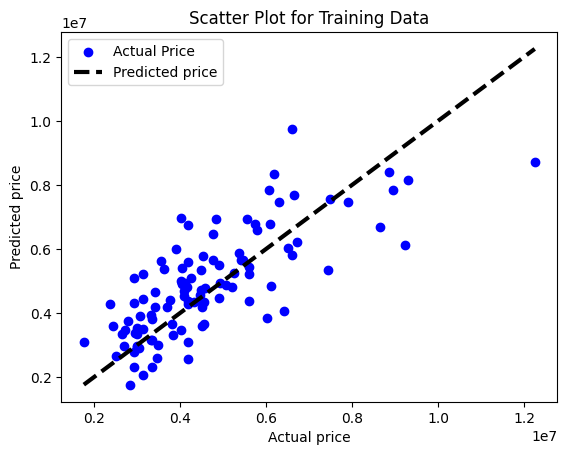

In [294]:
plt.scatter(y_test, y_pred_test_poly, color='b', label='Actual Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k--', color='k', lw=3, label="Predicted price")
plt.title('Scatter Plot for Training Data')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.legend()
plt.show()